In [5]:
# importing required modules
import PyPDF2
import numpy as np
import re
import pandas as pd
import datetime
import matplotlib.dates as mdates #to handle time series


# creating a pdf file object
pdfFileObj = open('C:/Users/alcon/Downloads/RD-Mortality-Report_2015-18-180531(4).pdf', 'rb')

# creating a pdf reader object
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

# saving the number of pages in pdf file
num_pages = pdfReader.numPages
page_data = []


def dataWrangling(i):
    test = []
    # creating a page object
    pageObj = pdfReader.getPage(i)

    # extracting text from page
    page = pageObj.extractText()
   # page = page.encode('utf-8')
    page = page.replace("6/4/2018\n", "")
    page = page.replace("JAN", "01")
    page = page.replace("FEB", "02")
    page = page.replace("MAR", "03")
    page = page.replace("APR", "04")
    page = page.replace("MAY", "05")
    page = page.replace("JUN", "06")
    page = page.replace("JUL", "07")
    page = page.replace("AGO", "08")
    page = page.replace("SEP", "09")
    page = page.replace("OCT", "10")
    page = page.replace("NOV", "11")
    page = page.replace("DEC", "12")
    page = re.sub("\D", " ", page)
    page = re.sub("                                                                                          ", "", page)
    page = page.split()

    page_data.append(page)


    for j in range(5, len(page), 5):
        test.append(page[(j-5):j])
        if (int(page[j]) >= 2000):
            break

    test = np.array(test)
    df = pd.DataFrame(test, columns=['month', '2015', '2016', '2017', '2018'])
    df['day'] = df.index
    cols = ['month', 'day', '2015', '2016', '2017', '2018']
    df = df[cols]
    #print(df)
    #select_rows = df.iloc[1:, 0]
    df['day'] = df.index
    month = int(df.iloc[0:1, 0])
    df['month'] = month
    df = df.drop(df.index[0])
    #print(df)

    k = 0
    if month == 2:
        k = int(df.iloc[28, [2]])
        df.iloc[28, 2:6] = 0
        df.iloc[28, 3] = k
    return df

x = []
for i in range(num_pages):
    x.append(dataWrangling(i))
    #print(x[i])

df_of = pd.concat([x[0], x[1], x[2], x[3], x[4], x[5], x[6], x[7], x[8], x[9], x[10], x[11]])
#print(df_of)

df_off = pd.melt(df_of, id_vars=['month', 'day'], var_name='year', value_name='deaths')
#print(df_off)
#print(df_off.index)

date_ymd = []

for i in range(len(list(df_off.index))):
    if (int(df_off.iloc[i, [0]]) == 2 and int(df_off.iloc[i, [1]]) == 29 and (int(df_off.iloc[i, [2]]) == 2015 or int(df_off.iloc[i, [2]]) == 2017 or int(df_off.iloc[i, [2]]) == 2018)):
            date_ymd.append(None)
            continue
    date_ymd.append(datetime.date(int(df_off.iloc[i, [2]]), int(df_off.iloc[i, [0]]), int(df_off.iloc[i, [1]])))
print(type(date_ymd))
df_off['date'] = date_ymd
df_official = df_off #.drop(['month', 'year', 'day'], axis = 1)
cols = ['year', 'month', 'day', 'date', 'deaths']
df_official = df_official[cols]





# closing the pdf file object
pdfFileObj.close()

<class 'list'>


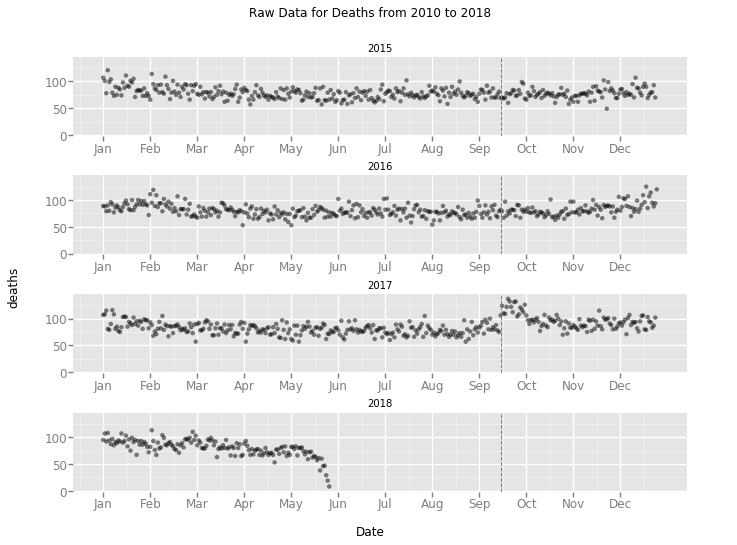

<ggplot: (-9223371901981280708)>
      year  month  day       date  deaths
0     2015      1    1 2015-01-01     107
1     2015      1    2 2015-01-02     101
2     2015      1    3 2015-01-03      78
3     2015      1    4 2015-01-04     121
4     2015      1    5 2015-01-05      99
5     2015      1    6 2015-01-06     104
6     2015      1    7 2015-01-07      79
7     2015      1    8 2015-01-08      73
8     2015      1    9 2015-01-09      90
9     2015      1   10 2015-01-10      75
10    2015      1   11 2015-01-11      88
11    2015      1   12 2015-01-12      85
12    2015      1   13 2015-01-13      74
13    2015      1   14 2015-01-14      98
14    2015      1   15 2015-01-15      88
15    2015      1   16 2015-01-16     111
16    2015      1   17 2015-01-17      92
17    2015      1   18 2015-01-18      90
18    2015      1   19 2015-01-19     101
19    2015      1   20 2015-01-20      98
20    2015      1   21 2015-01-21     105
21    2015      1   22 2015-01-22      71
2

In [22]:
##Plotting Raw data
#Step1: import packages #I should load all necessary packages at the beggining of the notebook. Remember to move this.
import matplotlib.pyplot as plt
import pandas as pd
from ggplot import * #plotting package analogous to ggplot2 from .R
import datetime
#Step2: Changing the values in df_official from strings into either numerics or datetimes
#This ensures we can plot the data and manupulate it later more esily
df_official.year = pd.to_numeric(df_official.year)
df_official.month = pd.to_numeric(df_official.month)
df_official.day = pd.to_numeric(df_official.day)
df_official.deaths = pd.to_numeric(df_official.deaths)
df_official.date = pd.to_datetime(df_official.date)
#Step3: Eliminate zeroes
#Select only dates where deaths !=0: dates before 2018-05-31
df_official_noNaNs = df_official[df_official.date < pd.to_datetime(20180531,format='%Y%m%d')]
df_official_noNaNs = df_official_noNaNs[df_official_noNaNs.deaths != 0]
#Step4: Building aesthetics for the Raw Data plot
p = ggplot(aes(x='df_official_noNaNs.date.dt.dayofyear', y="deaths"), data=df_official_noNaNs)
p = p + geom_point(alpha = 0.5)
p = p + geom_vline(x=pd.to_datetime(20170920, format='%Y%m%d').dayofyear, linetype = 'dashed', color = 'grey')
p = p + ggtitle(title = 'Raw Data for Deaths from 2010 to 2018')
p = p + scale_x_continuous(name = 'Date',breaks = range(1,366,31), labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
p = p + facet_wrap('year', ncol=1)
print(p)

In [23]:
##Estimating deaths and population (interpolate) in the missing data
#Step1:import packages (should move this to the beggining later)
import statsmodels as sm
import matplotlib.pyplot as plt
#Step2:Create a data.frame(df) with information to interpolate over
#df t is the real population data from the institute of statistics 
t = {'date':['2010-07-02','2011-07-02','2012-07-02','2013-07-02','2014-07-02','2015-07-02','2016-07-02','2017-07-02'],'pop':[3721525, 3678732, 3634488, 3593077, 3534874, 3473177, 3406520, 3337177]}
#df s is the estimated population calculated with the phone activity records from
#Teralytics. #We added or substracted to the population data from 2017-06-01 depending on phone activity to
#get our population estimaes.
s = {'date':['2017-09-19','2017-10-15','2017-11-15','2017-12-15','2018-01-15','2018-02-15'],'pop':[3337000,3237000,3202000,3200000,3223000,3278000]}
t_df=pd.DataFrame(data=t)
s_df=pd.DataFrame(data=s)
#binding together both t and s data.frames (df)
tmp_df=pd.concat([t_df,s_df])
tmp_df = tmp_df.reset_index(drop=True)
#Changing the data type from sting to datetime and integer
tmp_df['date'] = pd.to_datetime(tmp_df['date'])
tmp_df['pop'] = pd.to_numeric(tmp_df['pop'], downcast = 'integer')
#Concatenating the tmp df and the official df to be able to interpolate over the missing values
t_df = pd.concat([df_official,tmp_df], keys = 'date')
t_df = t_df.reset_index(drop=True)
t_df = t_df.sort_values(by = 'date')
t_df = t_df.reset_index(drop=True)

#We only want to interpolate over populaion, we use date as the x axis.
t_df = t_df.iloc[0:1475,[0,4]] #We select only the date and pop columns

t_df_inter = t_df.interpolate(method='linear') #we do a linear interpolation

#Left join the estimated population to the official data.frame
df_official_interpolated = df_official.merge(t_df_inter, on = "date")
#Interpolation Success
##Calculating daily death rate estimate
df_official_interpolated = df_official_interpolated.assign(rate = df_official_interpolated['deaths']/df_official_interpolated['pop']*365*1000)


      year  month  day       date  deaths           pop       rate
0     2015      1    1 2015-01-01     107  3.534537e+06  11.049538
1     2015      1    2 2015-01-02     101  3.534200e+06  10.430933
2     2015      1    3 2015-01-03      78  3.533863e+06   8.056340
3     2015      1    4 2015-01-04     121  3.533525e+06  12.498849
4     2015      1    5 2015-01-05      99  3.533188e+06  10.227307
5     2015      1    6 2015-01-06     104  3.532851e+06  10.744863
6     2015      1    7 2015-01-07      79  3.532514e+06   8.162742
7     2015      1    8 2015-01-08      73  3.532177e+06   7.543507
8     2015      1    9 2015-01-09      90  3.531840e+06   9.301102
9     2015      1   10 2015-01-10      75  3.531503e+06   7.751658
10    2015      1   11 2015-01-11      88  3.531165e+06   9.096147
11    2015      1   12 2015-01-12      85  3.530828e+06   8.786890
12    2015      1   13 2015-01-13      74  3.530491e+06   7.650494
13    2015      1   14 2015-01-14      98  3.530154e+06  10.13

of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.
 [ipykernel_launcher.py:21]


In [24]:
##Calculating yearly death rate estimate
#We group by year and calculate the mean of all columns
df_official_summary = df_official_interpolated.groupby('year').mean()
#Rename the column 'rate' as 'year_rate'
df_official_summary['year_rate'] = df_official_summary['rate']

#keep only the 'year_rate column'
df_official_summary = df_official_summary.loc[:,'year_rate']

#Since we don't know the death rate of 2018 we assume it's the same as 2017
df_official_summary[2018] = df_official_summary[2017]

#Left join the 'year_estimate' into the official df
df_official_summary = df_official_summary.reset_index()

df_official_deathrate  = df_official_interpolated.merge(df_official_summary, on = 'year')

      year  month  day       date  deaths           pop       rate  year_rate
0     2015      1    1 2015-01-01     107  3.534537e+06  11.049538   8.202269
1     2015      1    2 2015-01-02     101  3.534200e+06  10.430933   8.202269
2     2015      1    3 2015-01-03      78  3.533863e+06   8.056340   8.202269
3     2015      1    4 2015-01-04     121  3.533525e+06  12.498849   8.202269
4     2015      1    5 2015-01-05      99  3.533188e+06  10.227307   8.202269
5     2015      1    6 2015-01-06     104  3.532851e+06  10.744863   8.202269
6     2015      1    7 2015-01-07      79  3.532514e+06   8.162742   8.202269
7     2015      1    8 2015-01-08      73  3.532177e+06   7.543507   8.202269
8     2015      1    9 2015-01-09      90  3.531840e+06   9.301102   8.202269
9     2015      1   10 2015-01-10      75  3.531503e+06   7.751658   8.202269
10    2015      1   11 2015-01-11      88  3.531165e+06   9.096147   8.202269
11    2015      1   12 2015-01-12      85  3.530828e+06   8.7868

In [52]:
##Calculating the median daily rate of death in relationship to the yearly rate of death
##Before the hurricane
#We select only the dates before 2017 and that are not Feb 29
temp = df_official_deathrate[(df_official_deathrate['date'] < pd.to_datetime(2017, format = '%Y')) & (np.logical_not((df_official_deathrate['month']==2) & (df_official_deathrate['day']==29)))]

#We group by month and day to calculate the median daily rate in relation to the yearly rate
group = temp.groupby(['month', 'day'])['rate', 'year_rate'].apply(lambda x: (x.rate - x.year_rate).median())
#Result: A new df with the estimated daily rate of death for 2015-2016

avg_rate = group.reset_index().rename(columns = {0:'avg_rate'})

In [53]:
##Locally Estimated Scatterplot Smoothing (LOESS) for the death rate trend from 2015 to 2016
#install necessary package
#!pip install scikit-misc
#import the package
from skmisc.loess import *
#Preprocessing the data por the fit
day = avg_rate.assign(year = 1970).drop(columns = 'avg_rate')
day = pd.to_datetime(day, format='%m%d%Y')
day = pd.to_numeric(day.dt.dayofyear)
xx = day.append([day-365, day+365], ignore_index = True)
xx = xx.sort_values().reset_index(drop=True)

yy = pd.Series(np.tile(avg_rate['avg_rate'], 3))


In [11]:
# Modified Helper function from the Scikit-misc github (https://github.com/has2k1/scikit-misc/blob/master/examples/loess-basic-usage.ipynb)
def loess_fit(x, y, span=0.75, degree=1):
    """
    loess fit and confidence intervals
    """
    # setup
    lo = loess(x, y, span=span, degree=degree)
    # fit
    lo.fit()
    # Predict
    prediction = lo.predict(x, stderror=True)
    # Compute confidence intervals
    ci = prediction.confidence(0.05)
    # Since we are wrapping the functionality in a function,
    # we need to make new arrays that are not tied to the
    # loess objects
    yfit = np.array(prediction.values)
    ymin = np.array(ci.lower)
    ymax = np.array(ci.upper)
    return yfit, ymin, ymax


In [66]:
#Carrying out the loess 
#Create loess objects
lo =loess(xx,yy, family = 'symmetric', span = 0.15, degree = 2)
lo.fit()
fit = pd.Series(lo.outputs.fitted_values)

#Add a column to the avg_rate df called 'trend', this will be the data of the fit
#The reason we add this column to the avg_rate df is to make use of the 'month' and 'day' columns
#This way it'll be easier to join this data with the official df
avg_rate['trend'] = pd.Series(fit) #Trouble: the len of fit=1095, len of avg_rate=365
#We drop the 'avg_rate' column
trend = avg_rate.drop(columns = 'avg_rate')

#joining trend to df_official
df_official_trend0 = df_official_deathrate.merge(trend, on = ['month', 'day'])
df_official_trend = df_official_trend0.sort_values('date').reset_index(drop=True)

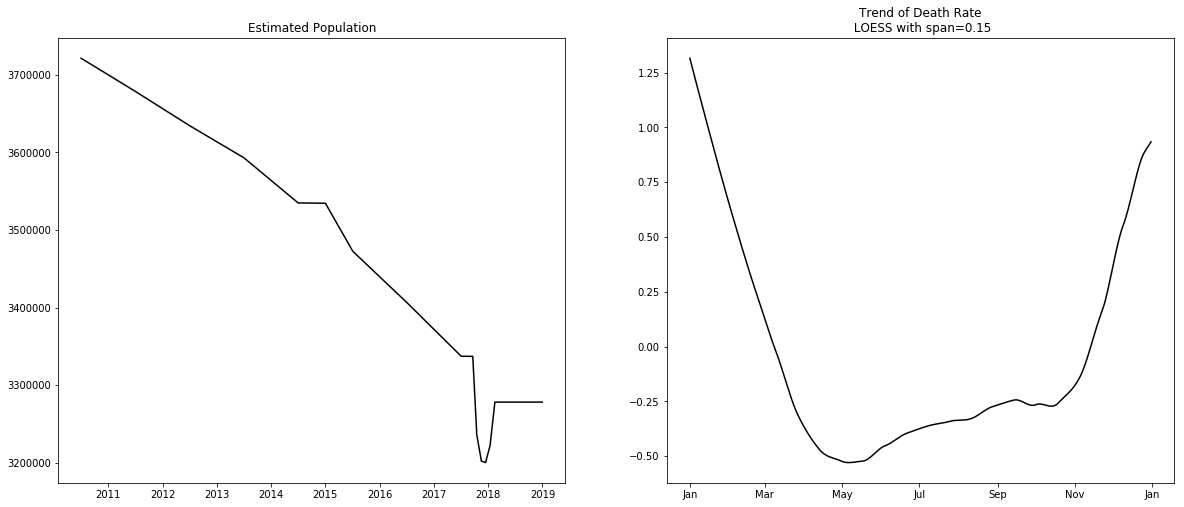

In [72]:
##Plotting the estimated population and the trend of death rate
temp = df_official_trend[(df_official_trend['date'] >= pd.to_datetime(2017, format = '%Y')) & (df_official_trend['date'] < pd.to_datetime(2018, format = '%Y'))]

fig1 = plt.figure(figsize=(20, 18))
#Figure 1: Estimated Population
ax1 = fig1.add_subplot(221)
ax1.plot('date', 'pop', color='black', data = t_df_inter)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.set_title('Estimated Population')

#Figure 2: Trend of Death Rate
ax1 = fig1.add_subplot(222)
ax1.plot('date', 'trend', color='black', data = temp)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax1.set_title("Trend of Death Rate\n LOESS with span=0.15")



#Show Figure
plt.show()
#Clear plot
plt.cla()
fig1.clf()
plt.close()

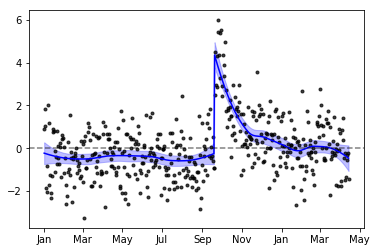

In [70]:
##LOESS for dates before the hurricane
#Select the dates before
temp1 = df_official_trend[(df_official_trend['date'] >= pd.to_datetime(2017, format = '%Y')) & (df_official_trend['date'] < pd.to_datetime(20170920, format = '%Y%m%d'))]

temp1 = temp1.assign(y = temp1['rate']-temp1['year_rate']-temp1['trend'], x = pd.to_timedelta(temp1['date']).dt.days)

before_smooth_fit, before_smooth_ymin, before_smooth_ymax =loess_fit(temp1['x'], temp1['y'], span=.66, degree = 2)

##LOESS for dates after the hurricane
#Selecting dates after 
temp2 = df_official_trend[(df_official_trend['date'] >= pd.to_datetime(20170920, format = '%Y%m%d')) & (df_official_trend['date'] < pd.to_datetime(20180415, format = '%Y%m%d'))]

temp2 = temp2.assign(y = temp2['rate']-temp2['year_rate']-temp2['trend'], x = pd.to_timedelta(temp2['date']).dt.days)

after_smooth_fit, after_smooth_ymin, after_smooth_ymax =loess_fit(temp2['x'], temp2['y'], span=.66, degree = 2)

#Joining before and after smooth, predicting standard error of the smooth
temp3 = df_official_trend[(df_official_trend['date'] >= pd.to_datetime(20170101, format = '%Y%m%d')) & (df_official_trend['date'] < pd.to_datetime(20180415, format = '%Y%m%d'))]
temp3 = temp3.reset_index(drop=True)
temp3 = temp3.assign(smooth = pd.concat([pd.Series(before_smooth_fit),pd.Series(after_smooth_fit)],ignore_index=True))
temp3 = temp3.assign(ymin = pd.concat([pd.Series(before_smooth_ymin),pd.Series(after_smooth_ymin)], ignore_index = True))
temp3 = temp3.assign(ymax = pd.concat([pd.Series(before_smooth_ymax),pd.Series(after_smooth_ymax)], ignore_index = True))
temp3 = temp3.assign(diff = temp3['rate']-temp3['year_rate']-temp3['trend'])
tmp = temp3
#Creating figure of the loess fitted results
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot('date', 'diff', '.',color = 'black', alpha = 0.75, data = temp3)
plt.plot(temp3.date, temp3.smooth, color = 'blue')
plt.fill_between(temp3.date.dt.to_pydatetime(), temp3.ymin, temp3.ymax, color='blue',alpha=.25)
plt.axhline(linestyle = '--', color = 'black', alpha = 0.5)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()
#Close figs
fig.clear()


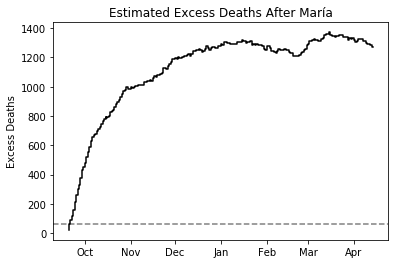

In [71]:
#Calculating Excess deaths by date
pop2017 = 3337177
temp = tmp[(tmp['date'] >= pd.to_datetime(20170920, format = '%Y%m%d'))]
temp = temp.assign(raw_cdf = np.cumsum(temp['diff']*pop2017/1000/365))
temp = temp.assign(smooth_cdf = np.cumsum(temp['smooth']*pop2017/1000/365))
#Plotting Excess deaths by date
fig = plt.figure()
ax = fig.add_subplot(111)
plt.step(temp.date, temp.raw_cdf, color = 'black')
plt.axhline(64,linestyle = '--', color = 'black', alpha = 0.5)
plt.ylabel("Excess Deaths")
plt.title("Estimated Excess Deaths After María")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))